<a href="https://colab.research.google.com/github/trinexus2002/CD_databits/blob/main/06_Ingenier%C3%ADa_de_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>

# <center>  Ingeniería de variable </center>

## Descripción
En esta lección se aplicará procesos de limpieza y transformación de datos como aspectos previos a la aplicación de modelos de Machine Learning

## Contenido

* Limpieza de datos
* Ingeniería de variable

## Requisitos previos

* Haber completado los cursos:
  - Introducción a Python
  - Estadística para Ciencia de Datos
  - Introducción a Machine Learning
  
<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

## Importación de librerías y verificación de versiones

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sklearn as sk

In [ ]:
print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('Seaborn:', sns.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Scikit-learn:', sk.__version__)

Python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
NumPy: 1.21.6
Pandas: 1.3.5
Seaborn: 0.11.2
Matplotlib: 3.2.2
Scikit-learn: 1.0.2


## Importación de módulos específicos en las librerías

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

### EDA (Exploratory Data Analysis)

**Dataset**: Este archivo de datos incluye toda la información necesaria sobre los hosts, la disponibilidad geográfica y métricas con respecto a los datos proporcionados por Airbnb en la ciudad de Madrid hasta el periodo de mayo 2020

[Link acceso Get the Data-Inside Airbnb](http://insideairbnb.com/get-the-data.html)

In [3]:
df = pd.read_csv('https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/03_Machine_Learning_II/Madrid_airbnb_datos_crudos.csv', 
                 header = 0, 
                 sep = ',', 
                 quotechar='"',
                 encoding = 'utf-8',
                 dtype = {'zipcode': object,
                          'weekly_price': object,
                          'monthly_price': object})
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20200514190756,2020-05-16,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Excellent connection with the AIRPORT and EXHI...,none,Nice and definitely non touristic neighborhoo...,...,f,f,flexible,f,f,1,0,1,0,0.61
1,21853,https://www.airbnb.com/rooms/21853,20200514190756,2020-05-16,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,none,We live in a leafy neighbourhood with plenty o...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,0.48
2,23001,https://www.airbnb.com/rooms/23001,20200514190756,2020-05-15,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Apartamento de lujo, tres dormitorios dobles i...","Apartamento de tres dormitorios dobles, gran s...",none,"Barrio Arganzuela, junto a Madrid Rio, zonas c...",...,f,f,moderate,f,f,7,6,1,0,NaN
3,24836,https://www.airbnb.com/rooms/24836,20200514190756,2020-05-16,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",none,"Cosmopolita, lleno de locales de moda, restaur...",...,f,f,moderate,f,f,1,1,0,0,0.62
4,26825,https://www.airbnb.com/rooms/26825,20200514190756,2020-05-16,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,none,"Es un barrio muy tranquilo, en una zona de Mad...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,1.22


In [ ]:
# Se lo hace numpy array para que muestre todo
np.array(df.keys())

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [4]:
# Información resumida del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21739 entries, 0 to 21738
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 17.6+ MB


In [ ]:
df['property_type'].value_counts()

Apartment                 17770
House                      1220
Condominium                 780
Loft                        704
Serviced apartment          310
Hostel                      292
Bed and breakfast           102
Townhouse                    77
Guest suite                  75
Boutique hotel               68
Other                        64
Guesthouse                   56
Chalet                       54
Hotel                        50
Tiny house                   29
Casa particular (Cuba)       20
Camper/RV                    19
Aparthotel                   10
Villa                         9
Dome house                    8
Earth house                   3
Hut                           3
Cabin                         3
Bungalow                      2
Barn                          2
Pension (South Korea)         2
Farm stay                     1
Tent                          1
Cave                          1
Nature lodge                  1
Igloo                         1
Yurt    

In [5]:
df['room_type'].value_counts()

Entire home/apt    13339
Private room        7831
Shared room          331
Hotel room           238
Name: room_type, dtype: int64

##### 1.1 Filtrado condicional de las observaciones

Enfocamos nuestro análisis en **Apartamentos** que posean una **Habitación privada**

In [6]:
# Filtrar observaciones del DataFrame por dos condiciones
df_filtrado = df.loc[(df['property_type'] == 'Apartment') & (df['room_type'] == 'Private room'), :].copy()
df_filtrado.shape

(5915, 106)

In [7]:
# Eliminar columnas
df_filtrado = df_filtrado.drop(['property_type', 'room_type'], axis=1)
df_filtrado.shape

(5915, 104)

##### 1.2 Selección de las columnas o variables de interés:

In [9]:
# Imprimir listado de columnas con sus respectiva posición en el DataFrame
indice_columnas = list(enumerate(df_filtrado.columns))
print(indice_columnas)

[(0, 'id'), (1, 'listing_url'), (2, 'scrape_id'), (3, 'last_scraped'), (4, 'name'), (5, 'summary'), (6, 'space'), (7, 'description'), (8, 'experiences_offered'), (9, 'neighborhood_overview'), (10, 'notes'), (11, 'transit'), (12, 'access'), (13, 'interaction'), (14, 'house_rules'), (15, 'thumbnail_url'), (16, 'medium_url'), (17, 'picture_url'), (18, 'xl_picture_url'), (19, 'host_id'), (20, 'host_url'), (21, 'host_name'), (22, 'host_since'), (23, 'host_location'), (24, 'host_about'), (25, 'host_response_time'), (26, 'host_response_rate'), (27, 'host_acceptance_rate'), (28, 'host_is_superhost'), (29, 'host_thumbnail_url'), (30, 'host_picture_url'), (31, 'host_neighbourhood'), (32, 'host_listings_count'), (33, 'host_total_listings_count'), (34, 'host_verifications'), (35, 'host_has_profile_pic'), (36, 'host_identity_verified'), (37, 'street'), (38, 'neighbourhood'), (39, 'neighbourhood_cleansed'), (40, 'neighbourhood_group_cleansed'), (41, 'city'), (42, 'state'), (43, 'zipcode'), (44, 'mar

In [8]:
listado_columnas = [40, 52, 53, 54, 55, 58, 80, 84]

In [11]:
df_seleccion = df_filtrado.iloc[:, listado_columnas].copy()
df_seleccion.tail(5)

,neighbourhood_group_cleansed,bathrooms,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating
21670,Fuencarral - El Pardo,1.0,1.0,1.0,Real Bed,$60.00,0,NaN
21671,Tetuán,1.0,1.0,1.0,Real Bed,$50.00,0,NaN
21677,Retiro,1.0,1.0,NaN,Real Bed,$30.00,0,NaN
21684,Ciudad Lineal,1.0,NaN,1.0,Real Bed,$23.00,0,NaN
21687,Chamartín,1.0,0.0,1.0,Real Bed,$15.00,0,NaN


In [12]:
# Examinar tipos de datos
df_seleccion.dtypes

neighbourhood_group_cleansed     object
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
price                            object
number_of_reviews                 int64
review_scores_rating            float64
dtype: object

##### 1.3 Conversión en tipos de datos

Ahora convertimos la columna **price** de tipo `object` a `float` usando `astype` de `Pandas`. 

Para ello, se requiere remover los caracteres especiales operando sobre una [cadenas de caracteres](https://docs.hektorprofe.net/python/metodos-de-las-colecciones/metodos-de-las-cadenas/):

In [13]:
df_seleccion['price']

0        $70.00
1        $30.00
11       $45.00
12       $20.00
26       $55.00
          ...  
21670    $60.00
21671    $50.00
21677    $30.00
21684    $23.00
21687    $15.00
Name: price, Length: 5915, dtype: object

In [14]:
# Creación de una función para limpiar columnas con caracteres especiales
def limpieza_caracteres(cadena):
  '''Función que elimina espacios, remueve el signo de dólares y retira separadores de miles (,) para convertir la variable en tipo float'''
  remover_espacios = cadena.strip()
  remover_signo = remover_espacios.replace('$', '')
  remover_coma = remover_signo.replace(',', '')
  return float(remover_coma)

In [15]:
# Limpiamos la columna correspondiente
df_seleccion['price'] = df_seleccion['price'].apply(limpieza_caracteres)  #Se usa apply para que lo haga distribuido en lugar de secuencial para no usar un for.

In [16]:
# Comprobar la conversión
df_seleccion.price.dtypes

dtype('float64')

## 2. Limpieza de datos

##### 2.1 Identificar de datos perdidos por columna

In [17]:
# Identificar columnas con valores NaN (Not a Number)
df_seleccion.isnull().sum()

neighbourhood_group_cleansed       0
bathrooms                          3
bedrooms                          15
beds                             194
bed_type                           0
price                              0
number_of_reviews                  0
review_scores_rating            1680
dtype: int64

En este caso solo se tiene valores perdidos en variables numéricas.

##### 2.2 Rangos variables numéricas

Limitar rango de la variable precio

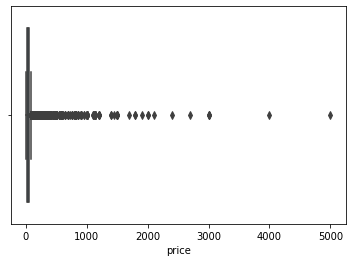

In [19]:
sns.boxplot(data = df_seleccion, x='price')

In [18]:
df_seleccion.price.describe()

count    5915.000000
mean       75.448859
std       191.038548
min         1.000000
25%        24.000000
50%        33.000000
75%        50.000000
max      5000.000000
Name: price, dtype: float64

In [20]:
df_seleccion.price.quantile(np.arange(0, 1.05, 0.05))

0.00       1.0
0.05      15.0
0.10      18.0
0.15      20.0
0.20      21.0
0.25      24.0
0.30      25.0
0.35      27.0
0.40      30.0
0.45      30.0
0.50      33.0
0.55      35.0
0.60      38.0
0.65      40.0
0.70      45.0
0.75      50.0
0.80      55.0
0.85      70.0
0.90     100.0
0.95     300.0
1.00    5000.0
Name: price, dtype: float64

In [21]:
p05 = df_seleccion.price.quantile(0.05)
p90 = df_seleccion.price.quantile(0.90)
print('Percentil 5%:', p05, 'Percentil 90%:', p90)

Percentil 5%: 15.0 Percentil 90%: 100.0


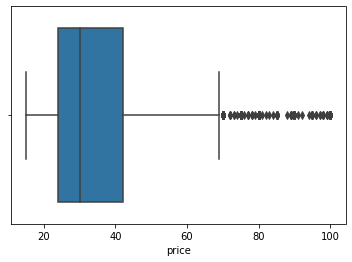

In [23]:
df_rango = df_seleccion.loc[(df_seleccion['price'] >= p05) & (df_seleccion['price'] <= p90), :].copy()
df_rango.shape
sns.boxplot(data = df_rango, x= 'price')

In [24]:
df_rango

,neighbourhood_group_cleansed,bathrooms,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating
0,Chamartín,1.0,1.0,0.0,Real Bed,70.0,75,98.0
1,Latina,1.0,1.0,1.0,Real Bed,30.0,33,92.0
11,Centro,1.5,1.0,2.0,Real Bed,45.0,78,91.0
12,Fuencarral - El Pardo,1.0,1.0,2.0,Real Bed,20.0,32,94.0
26,Centro,1.5,1.0,1.0,Real Bed,55.0,92,99.0
...,...,...,...,...,...,...,...,...
21670,Fuencarral - El Pardo,1.0,1.0,1.0,Real Bed,60.0,0,NaN
21671,Tetuán,1.0,1.0,1.0,Real Bed,50.0,0,NaN
21677,Retiro,1.0,1.0,NaN,Real Bed,30.0,0,NaN
21684,Ciudad Lineal,1.0,NaN,1.0,Real Bed,23.0,0,NaN


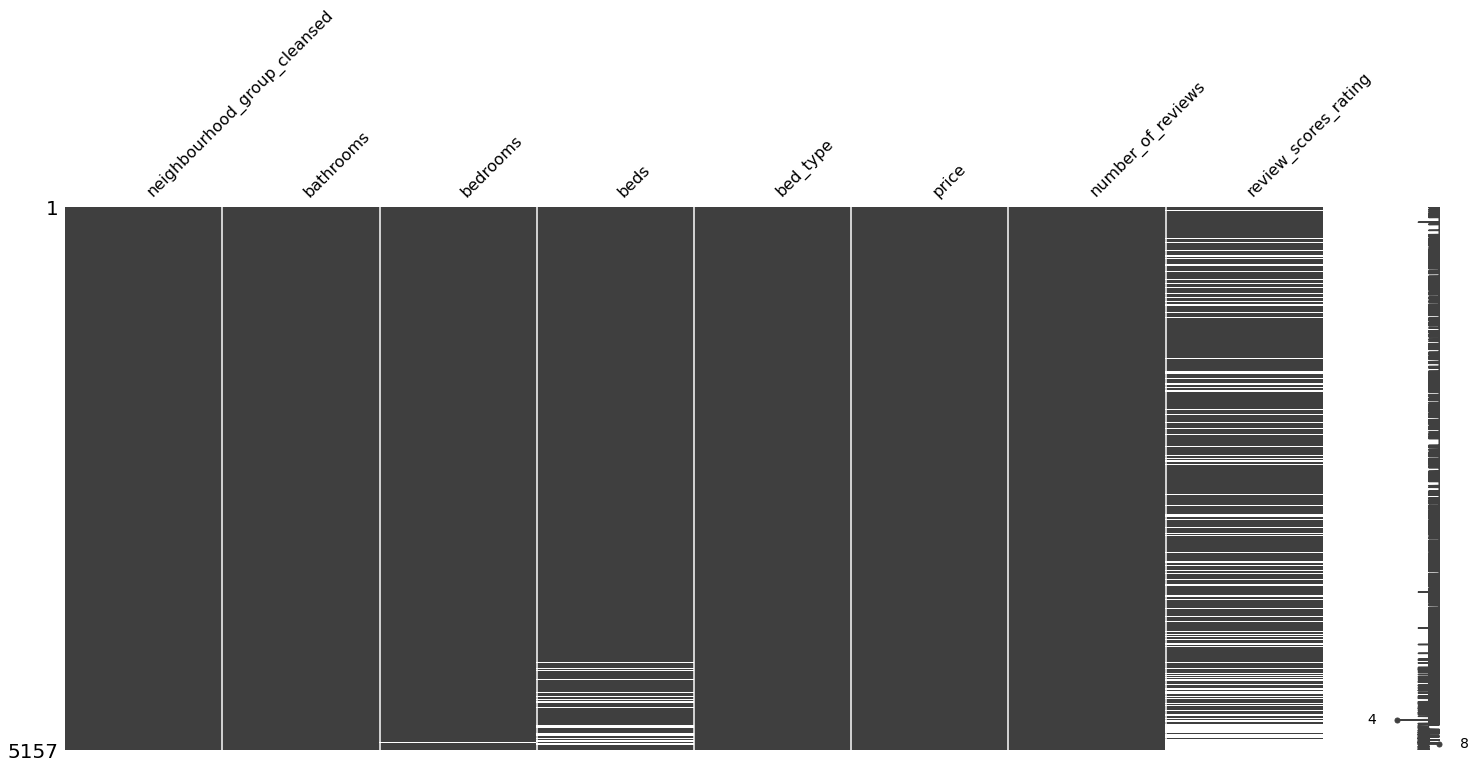

In [ ]:
import missingno as msg
msg.matrix(df_rango)

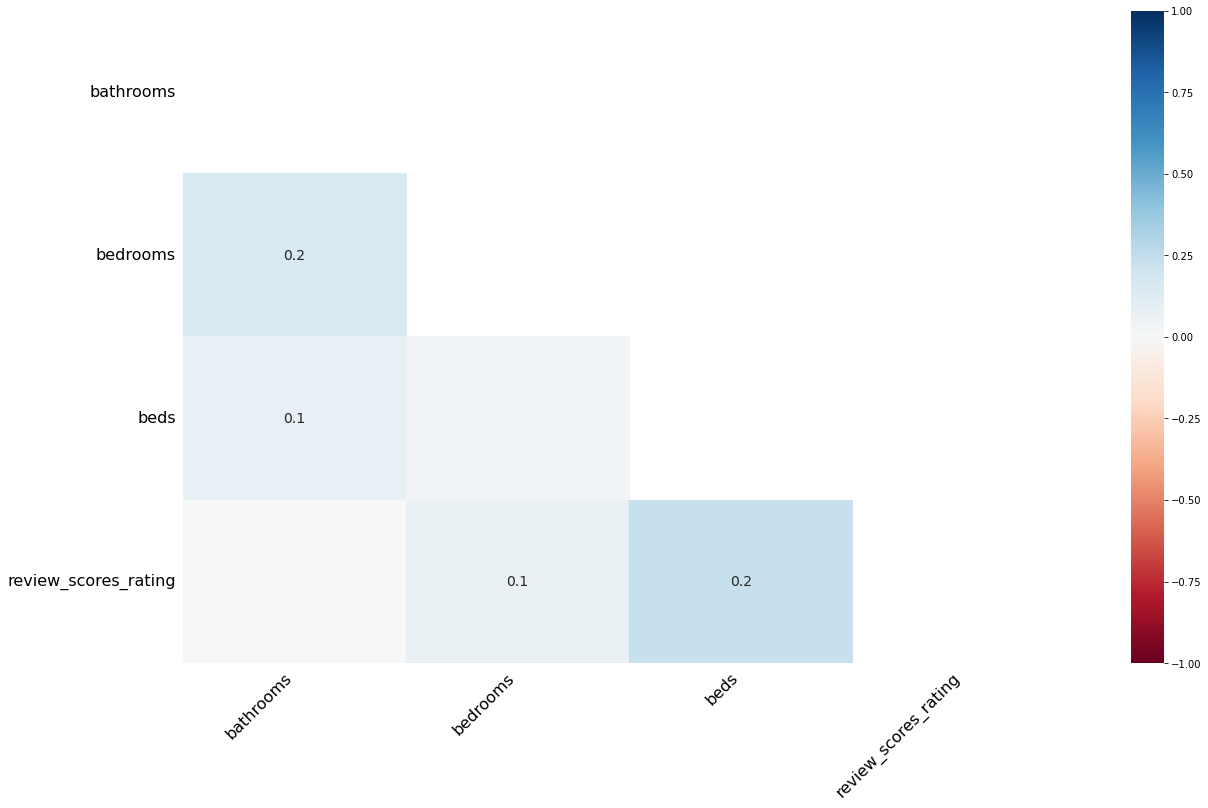

In [ ]:
msg.heatmap(df_rango)

In [ ]:
df_rango.corr

<bound method DataFrame.corr of       neighbourhood_group_cleansed  bathrooms  bedrooms  beds  bed_type  \
0                        Chamartín        1.0       1.0   0.0  Real Bed   
1                           Latina        1.0       1.0   1.0  Real Bed   
11                          Centro        1.5       1.0   2.0  Real Bed   
12           Fuencarral - El Pardo        1.0       1.0   2.0  Real Bed   
26                          Centro        1.5       1.0   1.0  Real Bed   
...                            ...        ...       ...   ...       ...   
21670        Fuencarral - El Pardo        1.0       1.0   1.0  Real Bed   
21671                       Tetuán        1.0       1.0   1.0  Real Bed   
21677                       Retiro        1.0       1.0   NaN  Real Bed   
21684                Ciudad Lineal        1.0       NaN   1.0  Real Bed   
21687                    Chamartín        1.0       0.0   1.0  Real Bed   

       price  number_of_reviews  review_scores_rating  
0       70.

##### 2.3 Identificar filas duplicadas

In [25]:
df_rango.duplicated().value_counts()

False    4659
True      498
dtype: int64

Eliminar filas duplicadas:

In [27]:
df_limpio = df_rango.drop_duplicates(subset=None, keep='first', inplace=False).copy()
df_limpio.shape

(4659, 8)

---

##### A partir del EDA realizado previamente el dataset dispone las siguientes características:

- Las siguientes variables poseen valores faltantes (missing data): `bathrooms`, `bedrooms`, `beds`, `review_scores_rating` 
- La variable precio presenta valores fuera del rango esperado. Por lo que fue truncada.
- Existen filas con valores duplicados. Por lo que se procedió a eliminarlas.

## 2. Preparación de datos

#### 2.1 Selección de variable objetivo y predictores

In [30]:
y = df_limpio.loc[:,'price'] # en Y localiza todas las filas que la columnas que sean price
X = df_limpio.loc[:, [i for i in df_limpio.columns if i != 'price']] # Loc selecciona serie o rango del dataframe en forma matricial. Toma toda fila, si es diferente de price.
# [neighborhood_goup_cleansed, bathrooms, bedrooms, beds, bed_type, number_of_reviews, reviews]
X

,neighbourhood_group_cleansed,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating
0,Chamartín,1.0,1.0,0.0,Real Bed,75,98.0
1,Latina,1.0,1.0,1.0,Real Bed,33,92.0
11,Centro,1.5,1.0,2.0,Real Bed,78,91.0
12,Fuencarral - El Pardo,1.0,1.0,2.0,Real Bed,32,94.0
26,Centro,1.5,1.0,1.0,Real Bed,92,99.0
...,...,...,...,...,...,...,...
21645,Puente de Vallecas,1.0,NaN,1.0,Real Bed,0,NaN
21660,Salamanca,2.0,1.0,NaN,Real Bed,0,NaN
21677,Retiro,1.0,1.0,NaN,Real Bed,0,NaN
21684,Ciudad Lineal,1.0,NaN,1.0,Real Bed,0,NaN


#### 2.2 Imputación y Escalamiento (variables numéricas) y One-Hot-Encoding (variables categóricas)

In [31]:
# Selección de la etiqueta de variables numéricas
X_num = X.select_dtypes(include=np.number).columns
print(X_num)

Index(['bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')


In [33]:
# Selección de la etiqueta de variables categóricas
X_cat = X.select_dtypes(include=object).columns
print(X_cat)

Index(['neighbourhood_group_cleansed', 'bed_type'], dtype='object')


In [ ]:
# Creación de un Pipeline para transformar variables numéricas y categóricas
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median')),  #Para los datos vacios vamos a llenarlos con la media
  ('scaler', MinMaxScaler(feature_range=(0, 1)))])  # una vez hecho hacer un escalamiento entre minimo y maximo sean 0 o 1

categorical_transformer = Pipeline(steps=[
  ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # One hot encoder transforma los valores categoricos en numeros.  ej azul 1, rojo 2, amarillo 3.  Luego hace escalamiento 1 = 0.33, 2 = 0.66, 3 = 1

In [ ]:
# Delimitar el procesamiento de variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_num),
        ('cat', categorical_transformer, X_cat)])

In [ ]:
# Aplicar el procesamiento (transformación de los datos)
X_prep = preprocessor.fit_transform(X).toarray()
X_prep

array([[0.06666667, 0.06666667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       [0.1       , 0.06666667, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.06666667, 0.06666667, 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       [0.06666667, 0.06666667, 0.06666667, ..., 0.        , 0.        ,
        1.        ],
       [0.06666667, 0.        , 0.06666667, ..., 0.        , 0.        ,
        1.        ]])

#### 2.3 Exportar datos procesados

Creación de un nuevo DataFrame con los arreglos n-dimensionales

In [ ]:
# Crear una lista con los nombres de las variables numéricas
name_num_prep = X_num.tolist()
print(name_num_prep)

['bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']


In [ ]:
# Crear una lista con los nombres de las variables categóricas
name_cat_prep = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out().tolist()
print(name_cat_prep)

['neighbourhood_group_cleansed_Arganzuela', 'neighbourhood_group_cleansed_Barajas', 'neighbourhood_group_cleansed_Carabanchel', 'neighbourhood_group_cleansed_Centro', 'neighbourhood_group_cleansed_Chamartín', 'neighbourhood_group_cleansed_Chamberí', 'neighbourhood_group_cleansed_Ciudad Lineal', 'neighbourhood_group_cleansed_Fuencarral - El Pardo', 'neighbourhood_group_cleansed_Hortaleza', 'neighbourhood_group_cleansed_Latina', 'neighbourhood_group_cleansed_Moncloa - Aravaca', 'neighbourhood_group_cleansed_Moratalaz', 'neighbourhood_group_cleansed_Puente de Vallecas', 'neighbourhood_group_cleansed_Retiro', 'neighbourhood_group_cleansed_Salamanca', 'neighbourhood_group_cleansed_San Blas - Canillejas', 'neighbourhood_group_cleansed_Tetuán', 'neighbourhood_group_cleansed_Usera', 'neighbourhood_group_cleansed_Vicálvaro', 'neighbourhood_group_cleansed_Villa de Vallecas', 'neighbourhood_group_cleansed_Villaverde', 'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa'

In [ ]:
#  Creación de un listado de nombres de las columnas
nombres_columnas = ['price'] + name_num_prep + name_cat_prep
print(nombres_columnas)

['price', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating', 'neighbourhood_group_cleansed_Arganzuela', 'neighbourhood_group_cleansed_Barajas', 'neighbourhood_group_cleansed_Carabanchel', 'neighbourhood_group_cleansed_Centro', 'neighbourhood_group_cleansed_Chamartín', 'neighbourhood_group_cleansed_Chamberí', 'neighbourhood_group_cleansed_Ciudad Lineal', 'neighbourhood_group_cleansed_Fuencarral - El Pardo', 'neighbourhood_group_cleansed_Hortaleza', 'neighbourhood_group_cleansed_Latina', 'neighbourhood_group_cleansed_Moncloa - Aravaca', 'neighbourhood_group_cleansed_Moratalaz', 'neighbourhood_group_cleansed_Puente de Vallecas', 'neighbourhood_group_cleansed_Retiro', 'neighbourhood_group_cleansed_Salamanca', 'neighbourhood_group_cleansed_San Blas - Canillejas', 'neighbourhood_group_cleansed_Tetuán', 'neighbourhood_group_cleansed_Usera', 'neighbourhood_group_cleansed_Vicálvaro', 'neighbourhood_group_cleansed_Villa de Vallecas', 'neighbourhood_group_cleansed_Villa

In [ ]:
# Creación de un DataFrame con los datos procesados
df_final = pd.DataFrame(data=np.c_[y, X_prep], columns=nombres_columnas)
df_final.head()

,price,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed_Arganzuela,neighbourhood_group_cleansed_Barajas,neighbourhood_group_cleansed_Carabanchel,neighbourhood_group_cleansed_Centro,neighbourhood_group_cleansed_Chamartín,neighbourhood_group_cleansed_Chamberí,neighbourhood_group_cleansed_Ciudad Lineal,neighbourhood_group_cleansed_Fuencarral - El Pardo,neighbourhood_group_cleansed_Hortaleza,neighbourhood_group_cleansed_Latina,neighbourhood_group_cleansed_Moncloa - Aravaca,neighbourhood_group_cleansed_Moratalaz,neighbourhood_group_cleansed_Puente de Vallecas,neighbourhood_group_cleansed_Retiro,neighbourhood_group_cleansed_Salamanca,neighbourhood_group_cleansed_San Blas - Canillejas,neighbourhood_group_cleansed_Tetuán,neighbourhood_group_cleansed_Usera,neighbourhood_group_cleansed_Vicálvaro,neighbourhood_group_cleansed_Villa de Vallecas,neighbourhood_group_cleansed_Villaverde,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,70.0,0.066667,0.066667,0.000000,0.116641,0.9750,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30.0,0.066667,0.066667,0.066667,0.051322,0.9000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45.0,0.100000,0.066667,0.133333,0.121306,0.8875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,20.0,0.066667,0.066667,0.133333,0.049767,0.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,55.0,0.100000,0.066667,0.066667,0.143079,0.9875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_final.to_csv('./datos_limpios_Airbnb.csv', index=True, sep = ',', decimal='.', encoding='utf-8')

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>